<a href="https://colab.research.google.com/github/gaurinaik22/CMPE257-Fall23-Gauri-Naik/blob/homework-4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [622]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns



####Task 1 - The Basic SVM Classifier

In [623]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [624]:
df_train  = pd.read_csv('/content/drive/MyDrive/ML/ZipDigits.train' , header=None, sep=' ')

In [625]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


In [626]:
df_train.shape

(7291, 258)

In [627]:
df_test = pd.read_csv('/content/drive/MyDrive/ML/ZipDigits.test', header=None, sep=' ')

In [628]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,9.0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
1,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
2,3.0,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
3,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,NaN
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0,NaN


In [629]:
df_test.shape

(2007, 258)

Removing NAN from the dataset column 257

In [630]:
df_train = df_train.drop(df_train.columns[257], axis=1)
df_test = df_test.drop(df_test.columns[257], axis=1)

In [631]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,3.0,-1.0,-1.0,-1.0,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7287,3.0,-1.0,-1.0,-1.0,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7288,3.0,-1.0,-1.0,-1.0,-0.783,-0.984,-0.827,0.068,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1.0
7289,0.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.549,0.463,0.999,0.999,...,-0.231,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1.0


In [632]:
print(df_train.shape)
print(df_test.shape)

(7291, 257)
(2007, 257)


In [633]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
count,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,...,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000,7291.000000
mean,3.903443,-0.996417,-0.981138,-0.951153,-0.887738,-0.773468,-0.610302,-0.368991,-0.045769,-0.052641,...,-0.198547,0.139823,0.116439,-0.314108,-0.653711,-0.837858,-0.922194,-0.957393,-0.979290,-0.994678
std,2.996386,0.051713,0.151202,0.244264,0.360516,0.502659,0.628710,0.716032,0.768304,0.752979,...,0.772895,0.752984,0.757336,0.725859,0.582555,0.414646,0.300830,0.228700,0.158998,0.066056
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999000,-0.950000,...,-1.000000,-0.661500,-0.738000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.719000,0.061000,0.002000,...,-0.353000,0.368000,0.336000,-0.579000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,7.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.962000,-0.391000,0.254500,0.696000,0.674500,...,0.554000,0.835000,0.815000,0.346000,-0.504500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,9.000000,0.638000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.592000


In [634]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Columns: 257 entries, 0 to 256
dtypes: float64(257)
memory usage: 14.3 MB


In [635]:
df_train.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
252    float64
253    float64
254    float64
255    float64
256    float64
Length: 257, dtype: object

In [636]:
df_Filtered_train = df_train.copy()

In [637]:
df_Filtered_train = df_Filtered_train[(df_Filtered_train[0] == 1.0) | (df_Filtered_train[0] == 5.0)]

In [638]:
df_Filtered_train

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
7,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
9,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
12,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.998,0.613,-0.385,...,-0.968,0.192,0.159,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
13,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.457,-0.219,...,-1.000,-0.086,0.804,-0.953,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,5.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7271,5.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.937,-0.333,...,0.820,0.549,0.154,-0.763,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7284,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.204,1.000,...,-1.000,0.028,1.000,0.274,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7285,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.744,0.788,0.113,...,-0.762,0.778,0.786,-0.748,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [639]:
df_Filtered_train[[0]].value_counts()

1.0    1005
5.0     556
dtype: int64

In [640]:
df_Filtered_train.loc[df_Filtered_train[0] == 1.0, 0] = 1
df_Filtered_train.loc[df_Filtered_train[0] == 5.0, 0] = -1

In [641]:
df_Filtered_train[[0]].value_counts()

 1.0    1005
-1.0     556
dtype: int64

In [642]:
df_Filtered_train.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1,-1.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
7,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
9,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
12,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.998,0.613,-0.385,...,-0.968,0.192,0.159,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
13,1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,0.457,-0.219,...,-1.000,-0.086,0.804,-0.953,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [643]:
df_Filtered_train[[0]].value_counts()

 1.0    1005
-1.0     556
dtype: int64

In [644]:
df_Filtered_test = df_test.copy()
df_Filtered_test.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9.0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3.0,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


In [645]:
df_Filtered_test = df_Filtered_test[(df_Filtered_test[0] == 1.0) | (df_Filtered_test[0] == 5.0)]
df_Filtered_test.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
16,1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.586,0.693,1.000,...,-1.000,-0.601,0.592,0.219,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0
32,5.0,-1.0,-1.0,-1.0,-1.0,-0.933,0.461,0.779,0.584,0.584,...,1.000,0.857,0.371,-0.397,-0.949,-1.0,-1.0,-1.0,-1.0,-1.0
36,5.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0
42,1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,0.561,-0.264,...,-0.874,0.374,0.729,-0.916,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0
45,1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,0.219,0.787,-0.333,...,-0.932,-0.169,0.935,0.396,-0.931,-1.0,-1.0,-1.0,-1.0,-1.0


In [646]:
# Split the DataFrame into X and y using array slicing for Train dataset
X_train = df_Filtered_train.iloc[:, 1:]
y_train = df_Filtered_train.iloc[:, 0]

In [647]:
X_train.shape

(1561, 256)

In [648]:
y_train.shape

(1561,)

In [649]:
# Split the DataFrame into X and y using array slicing for Test dataset
X_test = df_Filtered_test.iloc[:, 1:]
y_test = df_Filtered_test.iloc[:, 0]

In [650]:
X_test.shape

(424, 256)

In [651]:
y_test.shape

(424,)

In [652]:
# reshape the data into 16x16 images
X_train = X_train.values.reshape(-1, 16, 16)
X_test = X_test.values.reshape(-1, 16, 16)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [653]:
print(X_train.shape)
print(y_train.shape)

(1561, 16, 16)
(1561, 1)


In [654]:
print(X_test.shape)
print(y_test.shape)

(424, 16, 16)
(424, 1)


In [655]:
import matplotlib.pyplot as plt

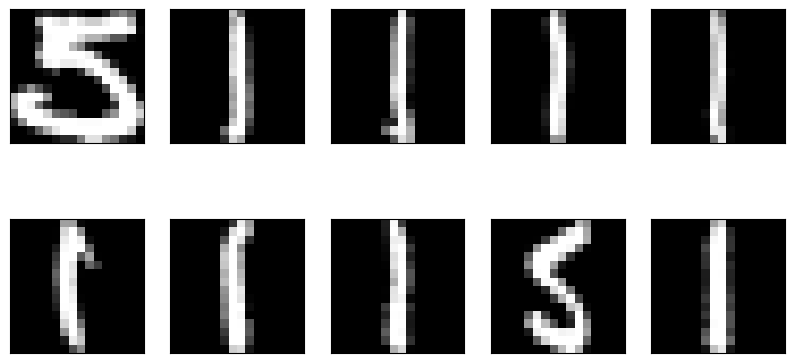

In [656]:
# Create a subplot for each image
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

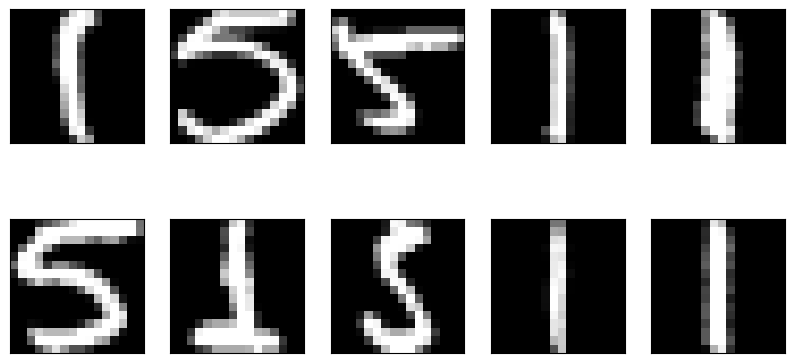

In [657]:
# Create a subplot for each image
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

In [658]:
def calculateIntensity(gray_image):
    return np.mean(gray_image)

In [659]:
pip install opencv-python

In [660]:
import cv2

In [661]:
def calculateSymmetry(gray_image):
    flipped_image = cv2.flip(gray_image, 1)
    difference = cv2.absdiff(gray_image, flipped_image)
    return np.mean(difference)

In [662]:
trainIntensities = []
trainSymmetries = []

for i in X_train:
    trainIntensities.append(calculateIntensity(i))
    trainSymmetries.append(calculateSymmetry(i))

In [663]:
testIntensities = []
testSymmetries = []

for i in X_test:
    testIntensities.append(calculateIntensity(i))
    testSymmetries.append(calculateSymmetry(i))


In [664]:
len(trainIntensities)

1561

In [665]:
len(trainSymmetries)

1561

In [666]:
len(testSymmetries)

424

In [667]:
len(testIntensities)

424

In [668]:
trainIntensities[:10], trainSymmetries[:10]

([-0.11173828124999999,
  -0.7539140625,
  -0.77228125,
  -0.7692578125,
  -0.7954375,
  -0.7159140625,
  -0.7020703125,
  -0.74220703125,
  -0.56403515625,
  -0.712375],
 [0.5337265625,
  0.1174375,
  0.162296875,
  0.059500000000000004,
  0.05090625000000001,
  0.34746875,
  0.16164062500000004,
  0.0686171875,
  0.4029921875,
  0.025328125000000003])

In [669]:
df_Filtered_train['intensity'] = trainIntensities
df_Filtered_train['symmetry'] = trainSymmetries

In [670]:
df_Filtered_test['intensity'] = testIntensities
df_Filtered_test['symmetry'] = testSymmetries

plot the symmetry vs target, red for 1 and blue for 5

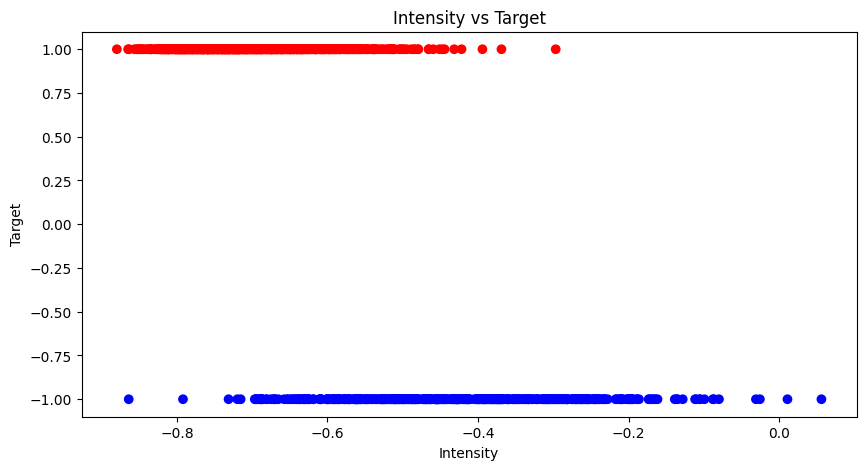

In [671]:
plt.figure(figsize=(10, 5))
plt.scatter(df_Filtered_train['intensity'], df_Filtered_train[0], c=df_Filtered_train[0], cmap='bwr')
plt.xlabel('Intensity')
plt.ylabel('Target')
plt.title('Intensity vs Target')
plt.show()

plot the intensity vs symmetry, red for 1 and blue for 5

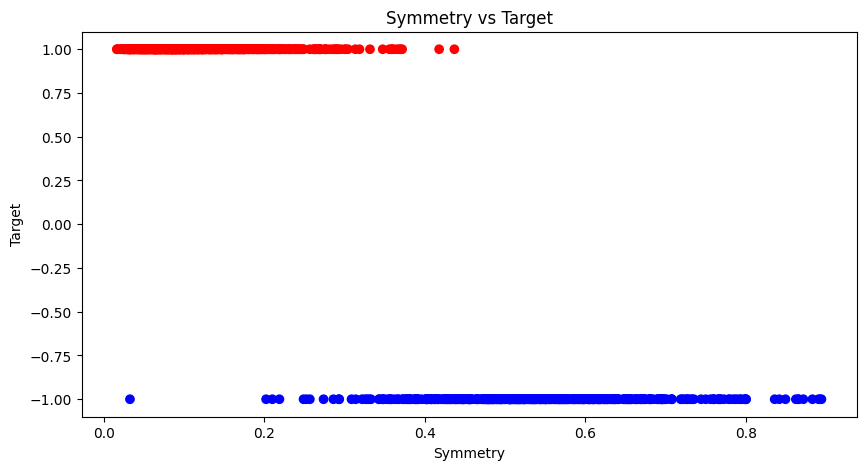

In [672]:
plt.figure(figsize=(10, 5))
plt.scatter(df_Filtered_train['symmetry'], df_Filtered_train[0], c=df_Filtered_train[0], cmap='bwr')
plt.xlabel('Symmetry')
plt.ylabel('Target')
plt.title('Symmetry vs Target')
plt.show()

In [673]:
import numpy as np

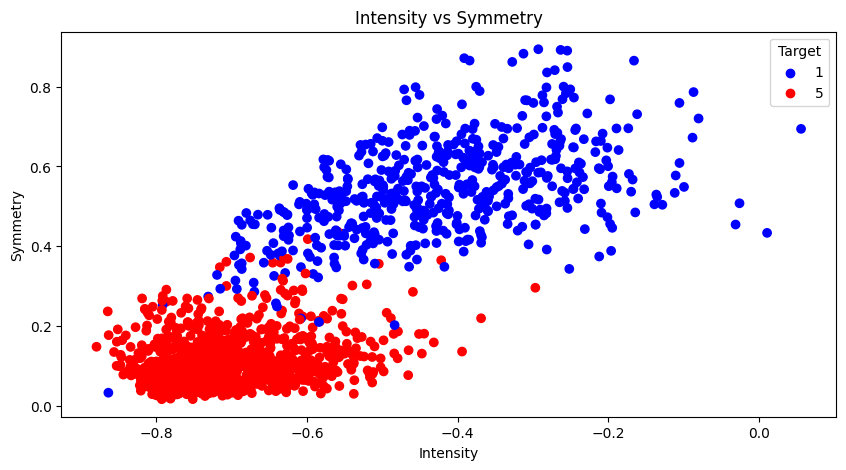

In [674]:
plt.figure(figsize=(10, 5))
colormap = np.array(['r', 'g'])
plt.scatter(df_Filtered_train['intensity'], df_Filtered_train['symmetry'], c=df_Filtered_train[0], cmap='bwr')
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
plt.title('Intensity vs Symmetry')
# add the legend to the plot, 1 for red and 5 for blue
plt.legend(handles=[plt.scatter([], [], c='blue', label='1'), plt.scatter([],[], c='red', label='5')], title='Target')
plt.show()

In [675]:
train_1000iter = pd.DataFrame({'x1': df_Filtered_train['intensity'], 'x2': df_Filtered_train['symmetry'], 'y':df_Filtered_train[0]})

In [676]:
test_1000iter = pd.DataFrame({'x1': df_Filtered_test['intensity'], 'x2': df_Filtered_test['symmetry'], 'y':df_Filtered_test[0]})

In [677]:
train_1000iter.head()

,x1,x2,y
1,-0.111738,0.533727,-1.0
7,-0.753914,0.117438,1.0
9,-0.772281,0.162297,1.0
12,-0.769258,0.059500,1.0
13,-0.795438,0.050906,1.0


In [678]:
test_1000iter.head()

,x1,x2,y
16,-0.680133,0.312063,1.0
32,-0.350320,0.765687,5.0
36,-0.497641,0.392437,5.0
42,-0.750781,0.085938,1.0
45,-0.561766,0.116406,1.0


In [679]:
train_1000iter['x0'] = 1
test_1000iter['x0'] = 1
train_1000iter = train_1000iter[['x0', 'x1', 'x2', 'y']]
test_1000iter = test_1000iter[['x0', 'x1', 'x2', 'y']]

In [680]:
train_1000iter.head()

,x0,x1,x2,y
1,1,-0.111738,0.533727,-1.0
7,1,-0.753914,0.117438,1.0
9,1,-0.772281,0.162297,1.0
12,1,-0.769258,0.059500,1.0
13,1,-0.795438,0.050906,1.0


In [681]:
test_1000iter.head()

,x0,x1,x2,y
16,1,-0.680133,0.312063,1.0
32,1,-0.350320,0.765687,5.0
36,1,-0.497641,0.392437,5.0
42,1,-0.750781,0.085938,1.0
45,1,-0.561766,0.116406,1.0


In [682]:
X = train_1000iter[['x1', 'x2']]
y = train_1000iter['y']

In [683]:
kernels = ['linear', 'poly', 'rbf']

**Training Error** - SVM classifier using the *linear kernel, the polynomial kernel* (3rd
order), and the *RBF kernel*

In [684]:
for k in kernels:
    svm = SVC(kernel=k, C=1, random_state=43)

    svm.fit(X, y)

    y_pred = svm.predict(X)

    trainError = 1 - accuracy_score(y, y_pred)

    print(f"{k.capitalize()} kernel: {trainError:.4f}")


Linear kernel: 0.0192
Poly kernel: 0.0173
Rbf kernel: 0.0179


Choosing a model based solely on training error, particularly favoring the Polynomial kernel due to its performance in that aspect, may lead to suboptimal outcomes. Training error, while indicative of the model's fit to the training data, does not provide a comprehensive assessment of its generalization ability to new, unseen data. Overfitting or underestimation of true model performance can occur when solely relying on training error.

To ensure a more robust model selection process, it is crucial to incorporate validation techniques. These include methods like cross-validation and splitting the dataset into training and validation sets. By evaluating the model on this independent validation set, one can gauge its performance on data not used during training. This process offers a more accurate estimation of the model's ability to generalize, capturing its performance in real-world scenarios.

In summary, emphasizing training error alone is inadequate for model selection. Incorporating validation techniques, such as cross-validation and independent validation sets, provides a more reliable assessment of a model's generalization capability and guards against the pitfalls of overfitting or underestimation on unseen data.

####Task 2  – Cross validation

In [685]:
pGrid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100]
}

In [686]:
svm = SVC()

In [687]:
gridSearch = GridSearchCV(estimator=svm, param_grid=pGrid, cv=5)
gridSearch.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']})

In [688]:
resultsCV = pd.DataFrame(gridSearch.cv_results_)
resultsCV = resultsCV[['param_kernel', 'param_C', 'mean_test_score']]
resultsCV = resultsCV.sort_values(by='mean_test_score', ascending=False)

**Cross-Validation Results**

In [689]:
resultsCV

,param_kernel,param_C,mean_test_score
7,poly,1,0.983344
12,linear,100,0.982703
8,rbf,1,0.982064
9,linear,10,0.982064
10,poly,10,0.982064
13,poly,100,0.982064
4,poly,0.1,0.982062
11,rbf,10,0.981423
6,linear,1,0.980782
14,rbf,100,0.980782


The optimal performance, indicated by the highest mean test score, is attained when utilizing the ***polynomial kernel*** in conjunction with a ***regularization parameter (C value)*** set at ***1***. This combination demonstrates superior performance as determined by the average score across folds during the cross-validation process.

Based on the outcomes observed, the preferred selection for the kernel and C value would be the ***polynomial kernel*** in conjunction with a ***regularization parameter (C value)*** set at ***1***. These choices are justified by their representation of the highest mean test scores as evident in the cross-validation experiment.

In [690]:
Cvalues = [0.01, 0.1, 1, 10, 100]

In [691]:
cvScores = np.zeros((len(kernels), len(Cvalues)))
insampleScores = np.zeros((len(kernels), len(Cvalues)))

In [692]:
for i, kernel in enumerate(kernels):
    for j, C in enumerate(Cvalues):
        svm = SVC(kernel=kernel, C=C)

        cvScores[i, j] = np.mean(cross_val_score(svm, X, y, cv=5))

        svm.fit(X, y)

        insampleScores[i, j] = svm.score(X, y)

Text(95.72222222222221, 0.5, 'Kernels')

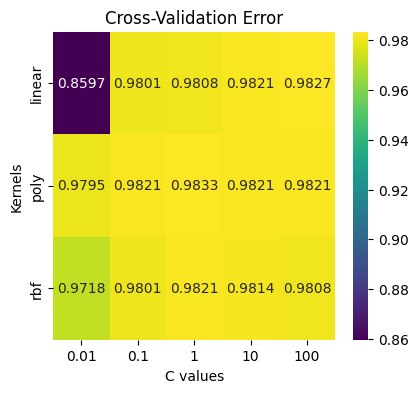

In [693]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cvScores, annot=True, cmap='viridis', xticklabels=Cvalues, yticklabels=kernels, fmt='.4f')
plt.title('Cross-Validation Error')
plt.xlabel('C values')
plt.ylabel('Kernels')


Text(518.4494949494949, 0.5, 'Kernels')

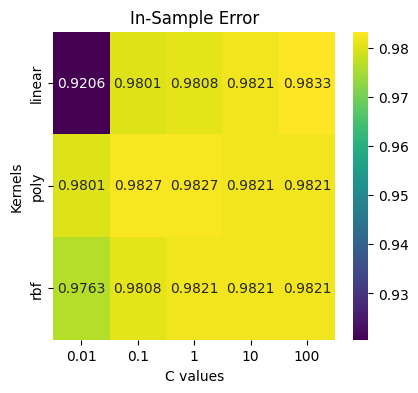

In [694]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
sns.heatmap(insampleScores, annot=True, cmap='viridis', xticklabels=Cvalues, yticklabels=kernels, fmt='.4f')
plt.title('In-Sample Error')
plt.xlabel('C values')
plt.ylabel('Kernels')

#plt.tight_layout()
#plt.show()


####Task 3  –  The final Hypothesis

In-sample error when C=10 (Training Dataset)

In [695]:
svm = SVC(kernel='rbf', C=10)

In [696]:
svm.fit(X, y)

SVC(C=10)

In [697]:
insampleError = 1 - svm.score(X, y)
print(f"In-Sample Error: {insampleError:.4f}")

In-Sample Error: 0.0179


In sample error when C=100 (Training Dataset)

In [698]:
svm = SVC(kernel='rbf', C=100)
svm.fit(X, y)
insampleError = 1 - svm.score(X, y)
print(f"In-Sample Error: {insampleError:.4f}")

In-Sample Error: 0.0179


In sample error when C=*0.01* (Training Dataset)

In [699]:
svm = SVC(kernel='rbf', C=0.01)
svm.fit(X, y)
insampleError = 1 - svm.score(X, y)
print(f"In-Sample Error: {insampleError:.4f}")

In-Sample Error: 0.0237


In [700]:
X_testing = test_1000iter[['x1', 'x2']]
y_testing = test_1000iter['y']

In sample error when C=*10* (Testing Dataset)

In [701]:
svm = SVC(kernel='rbf', C=10)
svm.fit(X, y)
insampleError = 1 - svm.score(X_testing, y_testing)
print(f"In-Sample Error: {insampleError:.4f}")

In-Sample Error: 0.4104


In sample error when C=*100* (Testing Dataset)

In [702]:
svm = SVC(kernel='rbf', C=100)
svm.fit(X, y)
insampleError = 1 - svm.score(X_testing, y_testing)
print(f"In-Sample Error: {insampleError:.4f}")

In-Sample Error: 0.4104


In sample error when C=0.01 (Testing Dataset)

In [703]:
svm = SVC(kernel='rbf', C=0.01)
svm.fit(X, y)
insampleError = 1 - svm.score(X_testing, y_testing)
print(f"In-Sample Error: {insampleError:.4f}")

In-Sample Error: 0.3962


###**Accuracy Results of various Algorithms:**

- Accuracy for ***Perceptron Learning Algo*** with ***p value 1*** : *95.97*
- Accuracy for ***Pocket Algo*** : *95.97*
- Accuracy for ***Pocket Algo 3rd order***: *85.40*
- Accuracy for ***SVM (C=100)*** : *96.22*
- Accuracy for ***Neural Network =10*** : *96.65*

The Neural Network demonstrates superior performance, leveraging its capacity to comprehend intricate relationships within the data. In contrast, the Perceptron Learning Algorithm (PLA) exhibits the lowest test accuracy. PLA is well-suited for linearly separable data but lacks efficacy when confronted with datasets of greater complexity.

For unraveling the underlying intricacies within the data, Neural Networks or Support Vector Machines (SVM) emerge as optimal choices. The increased volume of data proves beneficial in determining the most suitable parameters, especially the optimal value for 'g.' Notably, a linear classifier falls short when dealing with datasets characterized by complexity, emphasizing the advantage of employing more sophisticated models such as Neural Networks or SVM in such scenarios.